<font size=7> Arrow Animation

# Load Data

animation imports

In [1]:
from human_hip.animate import animate_waves
from human_hip.spike_data import read_phy_files, plot_raster

latency imports

In [2]:
from human_hip.spike_data import plot_vector_layout, plot_pair_analysis
import pickle
from ipywidgets import interact_manual

data

In [3]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start120s_stop130s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
#data_raw.keys()


In [4]:
with open("/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl", "rb") as filename:
    sd_curated = pickle.load(filename)

sd_base = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')


In [5]:
with open( 'curate_latencies_good_pairs.pkl' , 'rb') as my_file:
    good_pairs = pickle.load(my_file)

# <font color="brown"> Get Arrow

<font color="purple"> We want to find the long arrow! We should find the arrow whose length is over long, over 900. Of these long arrows, the pair will be the one whose end location is at the bottom. Using the code below, we find it:

Pair 3
Start [ 770. 1505.]
End [1312.5  507.5]

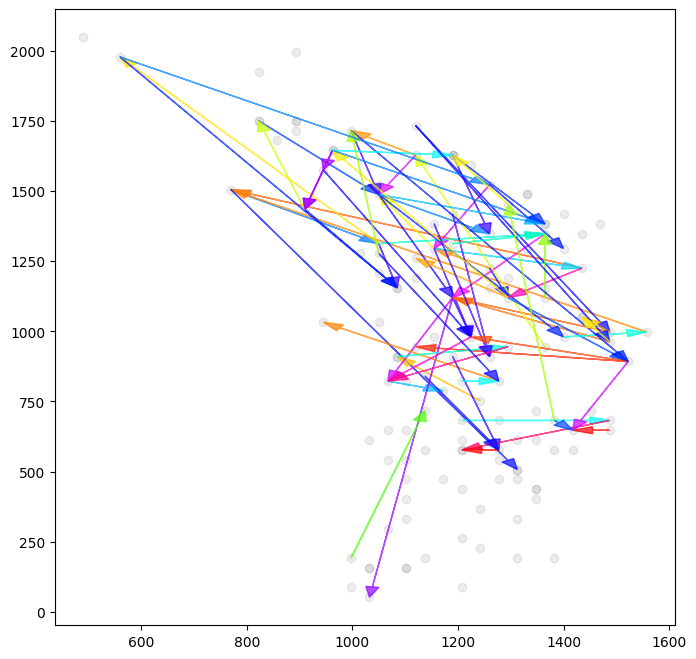

In [68]:
plot_vector_layout( sd_curated, good_pairs,  normalize=False)

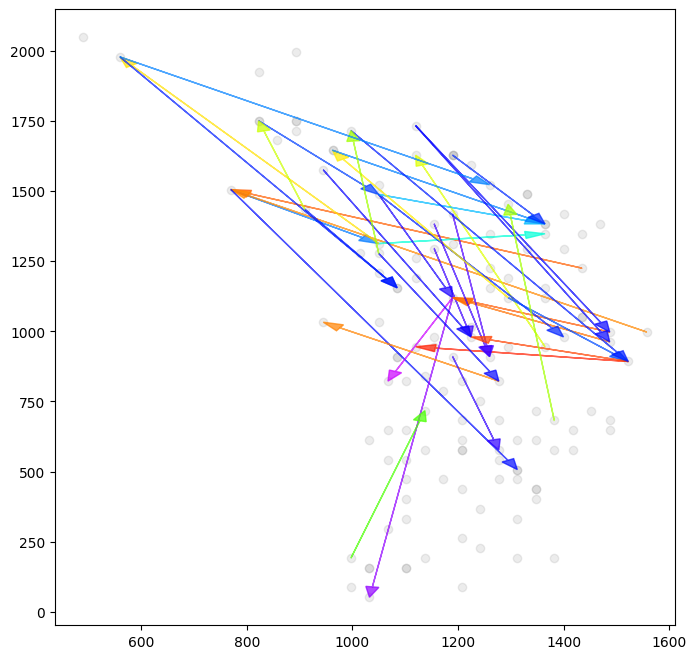

In [35]:
plot_vector_layout( sd_curated, good_pairs, min_dist=300, normalize=False)

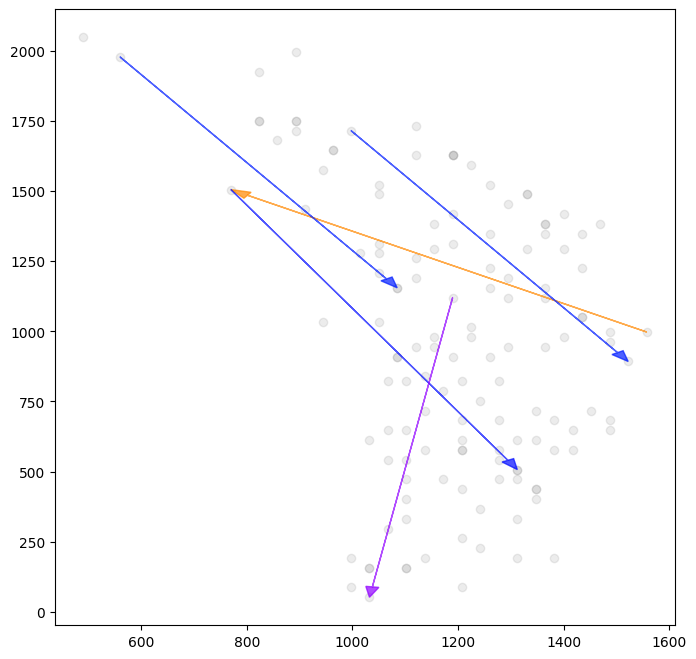

In [7]:
plot_vector_layout( sd_curated, good_pairs, min_dist=900, normalize=False)

/tmp/ipykernel_50868/1632637486.py:14: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


Pair 2
Start [1557.5  997.5]
End [ 770. 1505.]
Pair 3
Start [ 770. 1505.]
End [1312.5  507.5]
Pair 20
Start [1190. 1120.]
End [1032.5   52.5]
Pair 24
Start [ 560.  1977.5]
End [1085. 1155.]
Pair 65
Start [ 997.5 1715. ]
End [1522.5  892.5]


/tmp/ipykernel_50868/1632637486.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


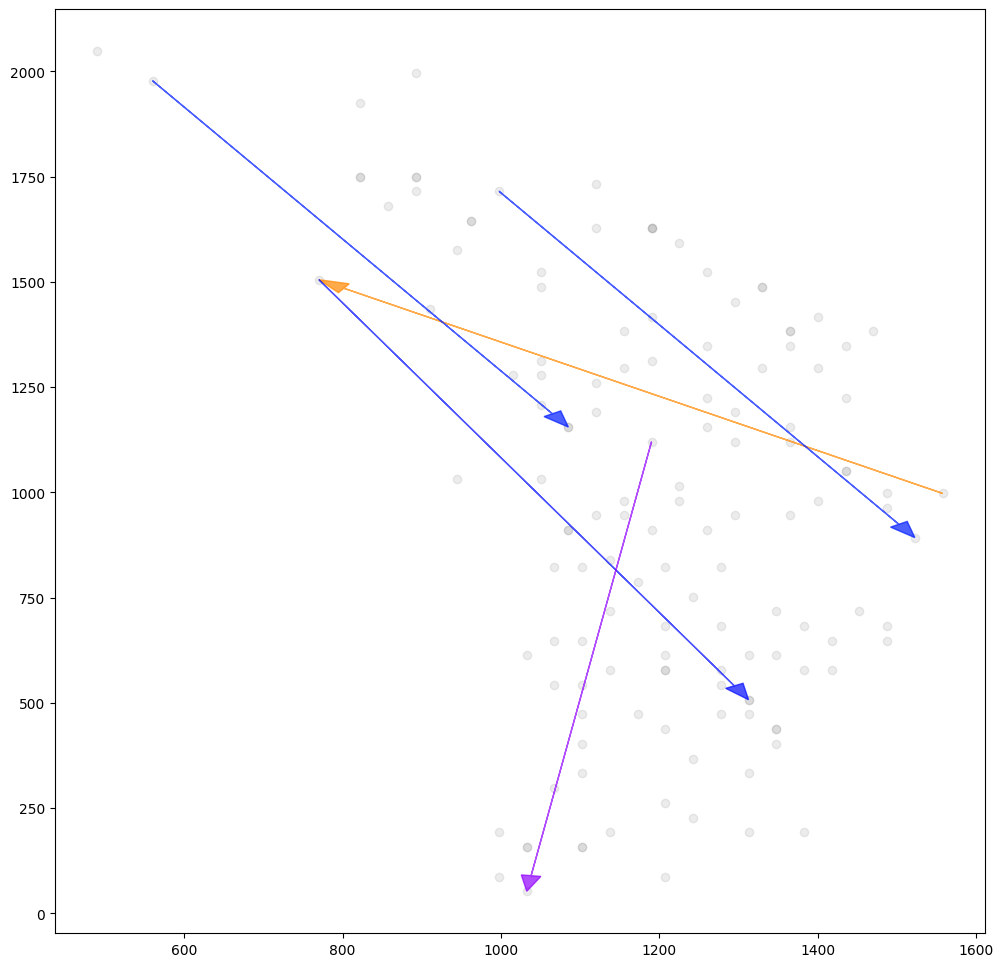

In [37]:
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrow
from sklearn import preprocessing
import numpy as np
from human_hip.spike_data import latencies
import math
import matplotlib.cm as cm

pairs = good_pairs
sd = sd_curated
min_dist = 900

neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)

# Plot original scatter
plt.figure(figsize=(12, 12))
plt.scatter( neuron_xy[:,0], neuron_xy[:,1], alpha=0.15, c='grey')

# make pairs point in same direction
pairs = pairs                         # make a copy of pairs, this avoids some bug
for i in range(len(pairs)):
    lag = np.median(latencies( pairs[i][0], pairs[i][1], sd, ms_cutoff_high=20))
    if lag<0:
        pairs[i] = [ pairs[i][1], pairs[i][0] ]


# Creat arrows show angle of information flow from a neuron
starts = neuron_xy[ pairs[:,0] ]  # Get the x/y locations of the start and end neurons of each pair
ends = neuron_xy[ pairs[:,1] ]
centered = ends-starts   # Get the directions of arrows, then make of of them the same length
normalized =  centered # make same lengths, unless told otherwise

# Draw Arrows
cmap = cm.get_cmap('hsv')
for i in range(len(starts)):
    if math.dist(starts[i], ends[i]) < min_dist:
        continue
    print( "Pair", i)
    print("Start", starts[i])
    print("End", ends[i])
    angle = (math.atan2(-(ends[i][1]-starts[i][1]), ends[i][0]-starts[i][0]) + np.pi) / (2 * np.pi)
    arrow = FancyArrow( 
            starts[i][0], starts[i][1], normalized[i][0], normalized[i][1], length_includes_head=True, head_width=25,
            linewidth=1, color=cmap(angle), alpha=0.7 ) #color="red"
    plt.gca().add_patch(arrow)


In [69]:
@interact_manual(num=(0,len(good_pairs)-1))
def analyzePair(num):
    plot_pair_analysis( good_pairs[num][0], good_pairs[num][1], sd_curated)

interactive(children=(IntSlider(value=38, description='num', max=76), Button(description='Run Interact', style…

# <font color="brown"> Get Animation Time

Making animation of 0.278 minutes


KeyboardInterrupt: 

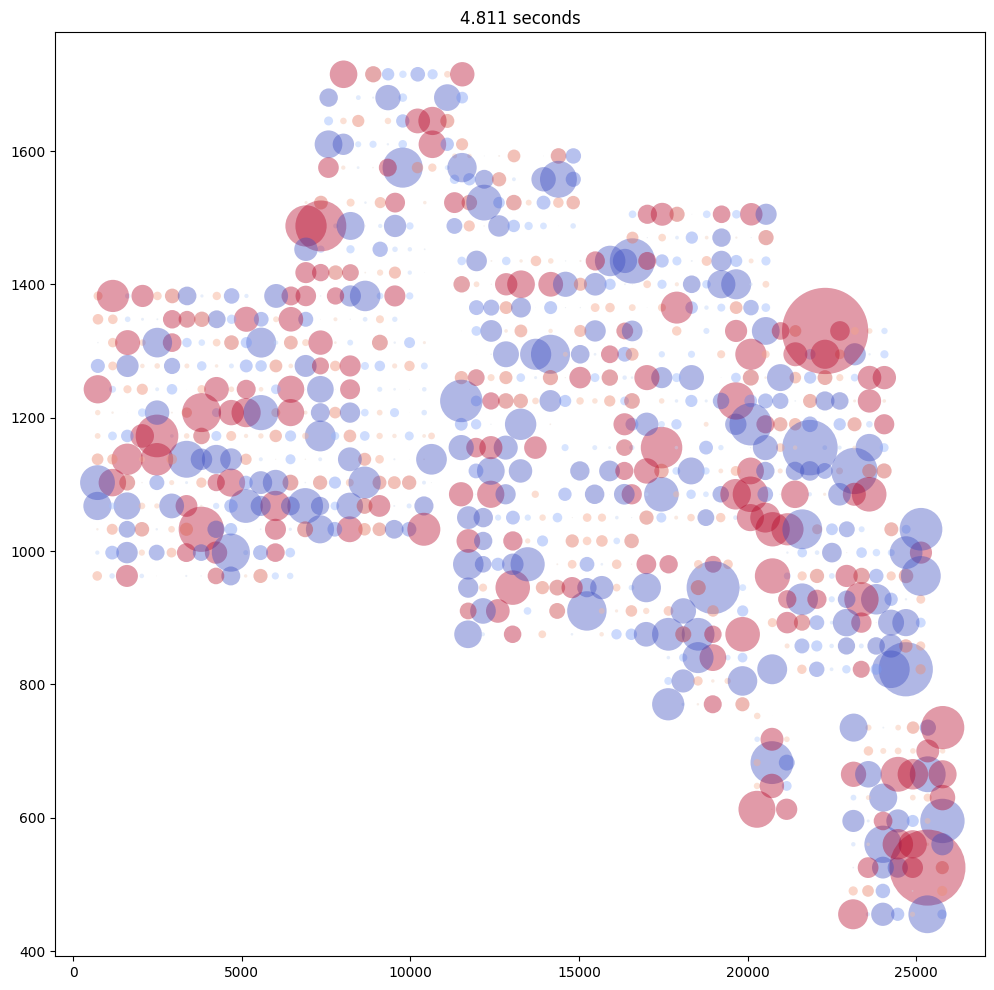

In [6]:
animate_waves(data_raw, "alpha", movie_range_ms= range(4400,4900,3), filename="checkit.mp4" )

# <font color="green"> Make Arrow Animation




In [7]:

from human_hip.raw_data import get_brain_waves
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from matplotlib.patches import FancyArrow


Saved animation to waves.mp4


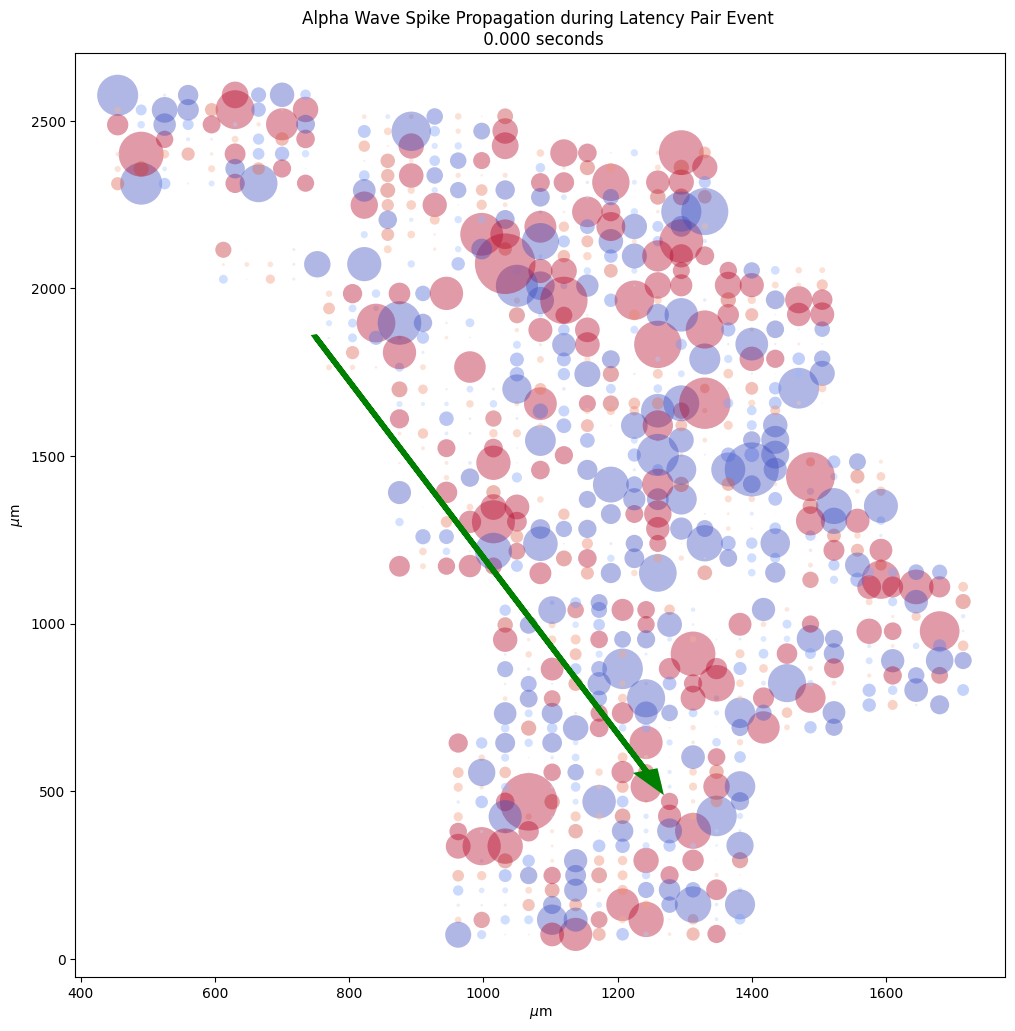

In [17]:

### Arrow I never used
# start1= [1190, 1420*10]
# end1 = [1032.5,   52.5*10]
# arrow = FancyArrow( 
#         start1[0], start1[1], end1[0]-start1[0], end1[1]-start1[1], length_includes_head=True, head_width=25,
#         linewidth=1, color="green", alpha=1 ) #color="red"
# plt.gca().add_patch(arrow)

start2= [ 800-50, 1855*10]
end2 = [1312.5-50,   507.5*10]

raw_dict = data_raw
movie_range_ms= range(4400,4600,1)
frame_interval_ms=50
filename="waves.mp4"
size_exp=1.9
size_scale=90


# Create initial plot to feed into animator
data = get_brain_waves( raw_dict["data"], raw_dict["frame_rate"] )["alpha"]  # get common brain waves
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
ax.set_title("Alpha Wave Spike Propagation during Latency Pair Event")
ax.set_ylabel("$\mu$m")
ax.set_xlabel("$\mu$m")
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( raw_dict['xy'][:,1], raw_dict['xy'][:,0]/10, c=data[:,0] , norm=norm, cmap=cm.coolwarm,
                       s=(np.abs(data[:,0])**size_exp)*size_scale , alpha=.4 , edgecolor='none' )

arrow = FancyArrow( 
        start2[0], start2[1]/10, end2[0]-start2[0], end2[1]/10-start2[1]/10, head_length=50,length_includes_head=True,  head_width=25,
        linewidth=4, color="green", alpha=1 ) #color="red"
plt.gca().add_patch(arrow)

# # animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    scatter._sizes = (np.abs(data[:,i])**size_exp)*size_scale
    ax.set_title(f"Alpha Wave Spike Propagation during Latency Pair Event \n {(i-4400)/1000:.3f} seconds")
    return scatter
anim = FuncAnimation(fig, animate, frames=movie_range_ms , interval=frame_interval_ms, blit=False)
anim.save( filename )
print( f"Saved animation to {filename}" )



In [ ]:

# start1= [1190, 1420*10]
# end1 = [1032.5,   52.5*10]
# arrow = FancyArrow( 
#         start1[0], start1[1], end1[0]-start1[0], end1[1]-start1[1], length_includes_head=True, head_width=25,
#         linewidth=1, color="green", alpha=1 ) #color="red"
# plt.gca().add_patch(arrow)

start2= [ 800, 1855*10]
end2 = [1312.5,   507.5*10]

raw_dict = data_raw
movie_range_ms= range(4400,4600,3)
frame_interval_ms=100
filename="waves.mp4"
size_exp=1.9
size_scale=90


# Create initial plot to feed into animator
data = get_brain_waves( raw_dict["data"], raw_dict["frame_rate"] )["alpha"]  # get common brain waves
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( raw_dict['xy'][:,1], raw_dict['xy'][:,0], c=data[:,0] , norm=norm, cmap=cm.coolwarm,
                       s=(np.abs(data[:,0])**size_exp)*size_scale , alpha=.4 , edgecolor='none' )

arrow = FancyArrow( 
        start2[0], start2[1], end2[0]-start2[0], end2[1]-start2[1], head_length=400,length_includes_head=True,  head_width=25,
        linewidth=4, color="green", alpha=1 ) #color="red"
plt.gca().add_patch(arrow)

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    scatter._sizes = (np.abs(data[:,i])**size_exp)*size_scale
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter
anim = FuncAnimation(fig, animate, frames=movie_range_ms , interval=frame_interval_ms, blit=False)
anim.save( filename )
print( f"Saved animation to {filename}" )
